In [1]:
import scipy.io as scio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
from pylab import *
import numpy as np

from matplotlib import cm

%matplotlib inline  

In [16]:
dataFile='sub2_comp.mat'
data=scio.loadmat(dataFile)
output = []

In [9]:
fs = 1000
nf = fs / 2 #nyquist frequency

cutoff = 5 #Hz
b, a = signal.butter(3, cutoff/nf) #使用3階低通濾波器

In [10]:
finger = []
brain = []

for i in range(len(data['train_data'].T)):
    finger.append(signal.filtfilt(b, a, data['train_data'].T[i]))
for i in range(5):
    brain.append(signal.filtfilt(b, a, data['train_dg'].T[i]))

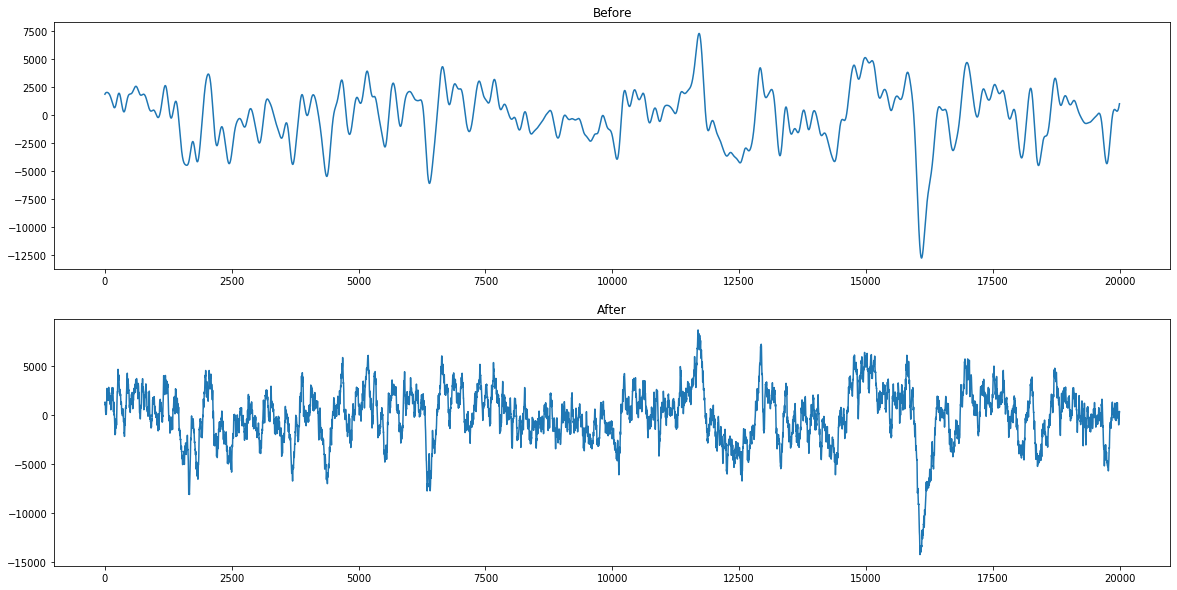

In [11]:
# 畫出並觀察
fig = plt.figure(figsize = (20, 10))
ax0 = fig.add_subplot(211)
ax0.set_title("Before")
ax0.plot(finger[1][140000:160000])
ax1 = fig.add_subplot(212)
ax1.set_title("After")
ax1.plot(data['train_data'].T[1][140000:160000])
plt.show()

In [12]:
scio.savemat('sub3_comp_5hz_3order.mat', dict(finger=finger, brain=brain))

In [17]:
len(data['train_data'].T)

48